In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
import random as rnd

In [64]:
#!pip install scipy==1.1.0

In [65]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [66]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA

In [69]:
# Первичное знакомство с данными

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [71]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [72]:
# Перевод целевой переменной в числовой вид

In [4]:
data['y'] = data['y'].replace('yes', 1).replace('no', 0)
y = data['y']

In [5]:
data.y.groupby(data.y).count()

y
0    36548
1     4640
Name: y, dtype: int64

In [75]:
# Исключение переменной, добавленной в датасет для целей анализа результатов

In [6]:
data2 = data.drop(['duration'], axis=1)

In [77]:
# 'unknown' - соответствует 'N/A' согласно описанию данных

In [78]:
data2[data2=='unknown'].count().sort_values(ascending=False)

C:\Users\Дом\AppData\Roaming\Python\Python35\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


default           8597
education         1731
housing            990
loan               990
job                330
marital             80
y                    0
nr.employed          0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
age                  0
dtype: int64

In [79]:
# Анализ корреляций для поиска наиболее скоррелированных переменных

<IPython.core.display.Javascript object>


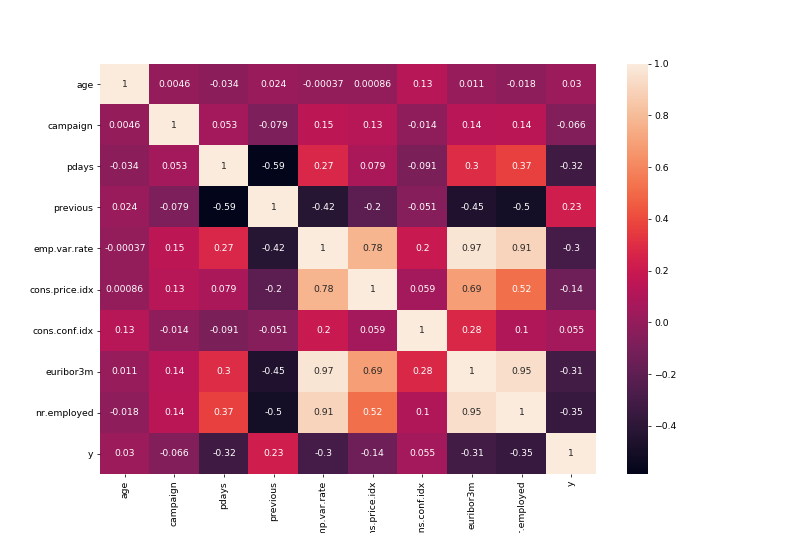

In [120]:
%matplotlib notebook
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data2.corr(), annot=True, ax=ax)

In [81]:
# Анализ распределений числовых переменных из датасета

<IPython.core.display.Javascript object>


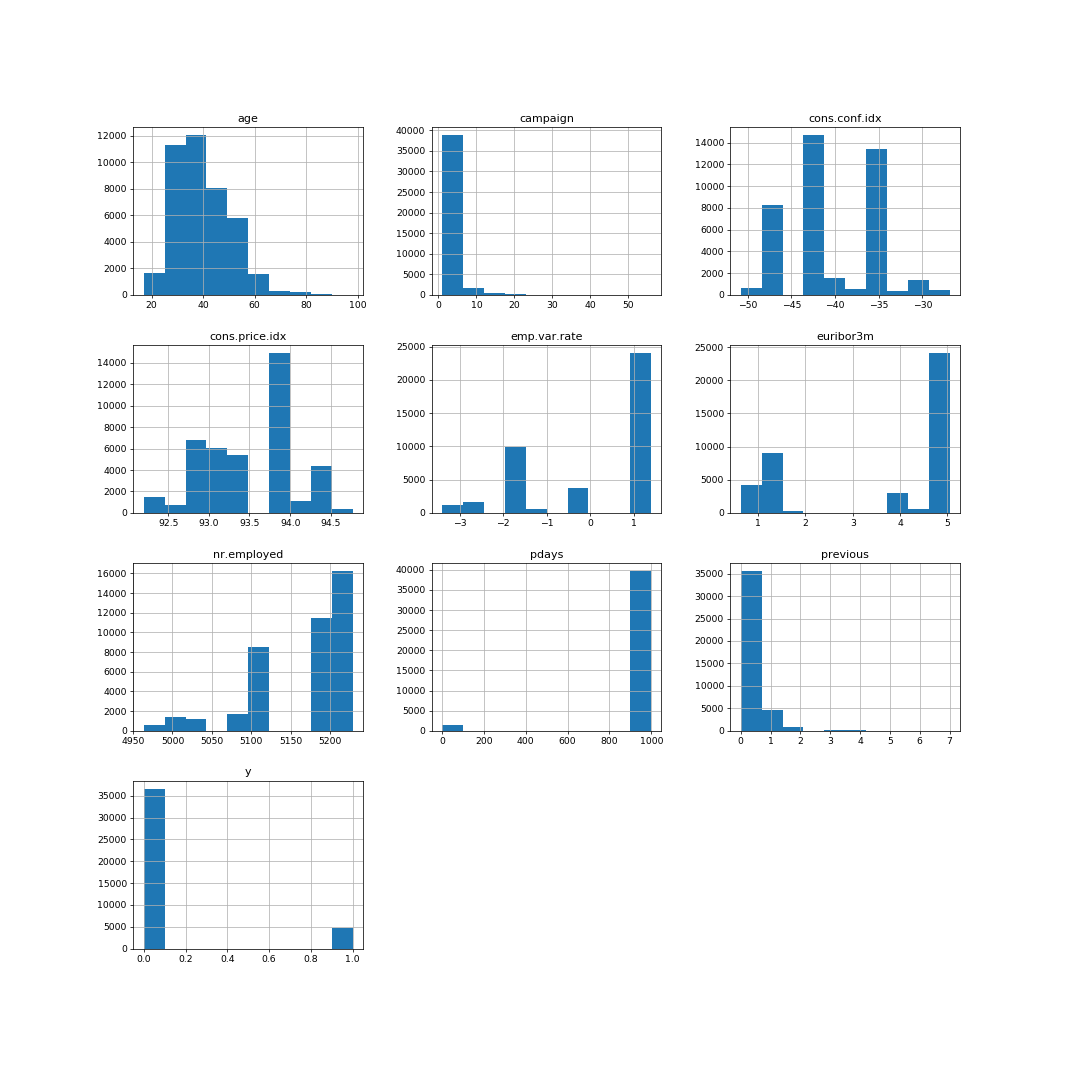

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002E50F96160>,
      dtype=object)

In [121]:
%matplotlib notebook
features_numer = []
for i in range(len(data2.columns)):
    if data2.iloc[:,i].dtype != 'O':
        features_numer.append(data2.iloc[:,i].name)
features_numer = list(set(features_numer))
data_numer = pd.DataFrame(data2,columns=features_numer)
#data_obj
data_numer.hist(figsize=(16,16))

In [83]:
# График pairplot позволяет увидеть диаграммы рассения дял пар признаков и признаковые распределения

<IPython.core.display.Javascript object>


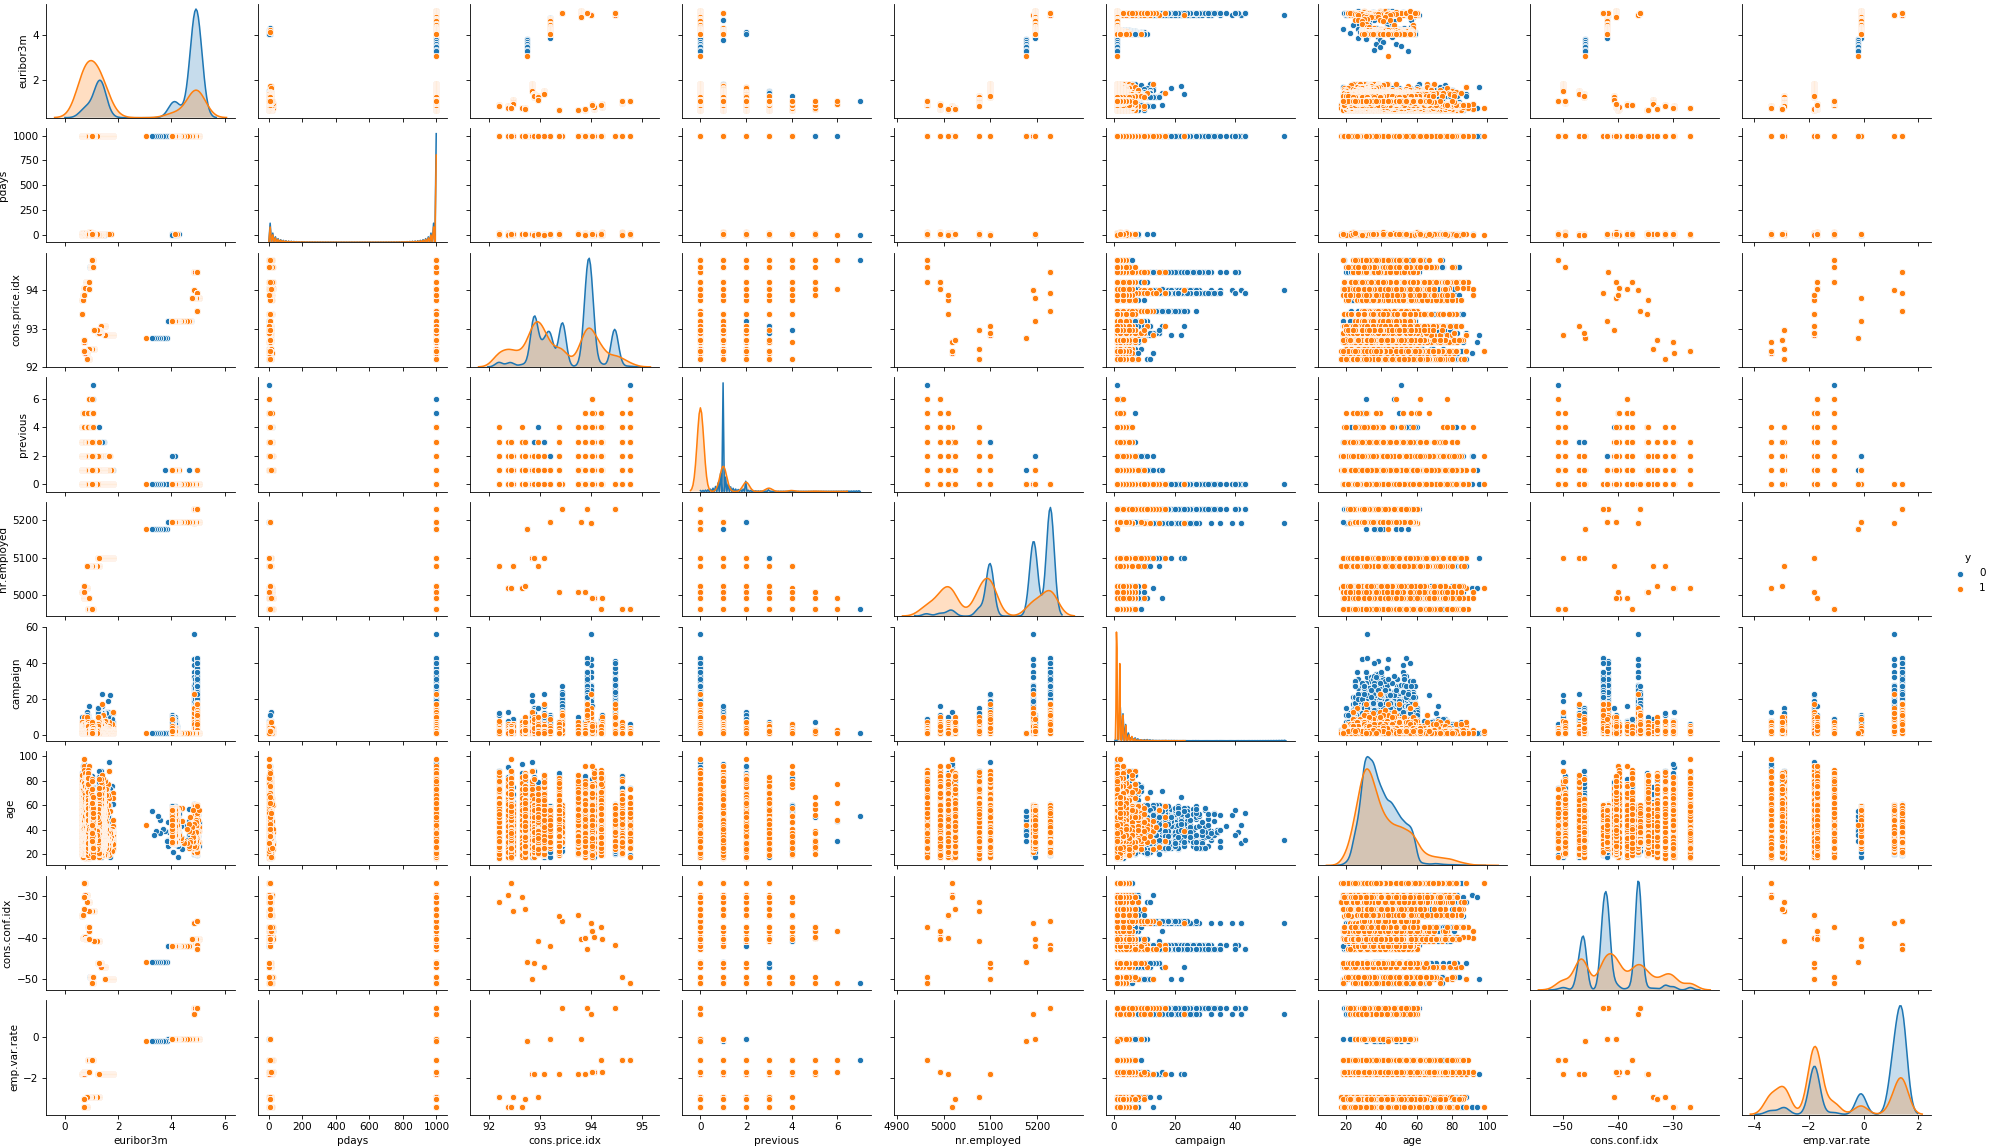

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [138]:
%matplotlib notebook
sns.pairplot(data_numer, hue='y', height=1.7, aspect=1.7)

In [85]:
# Распределения числовых переменных при разных значениях зависимой переменной

<IPython.core.display.Javascript object>


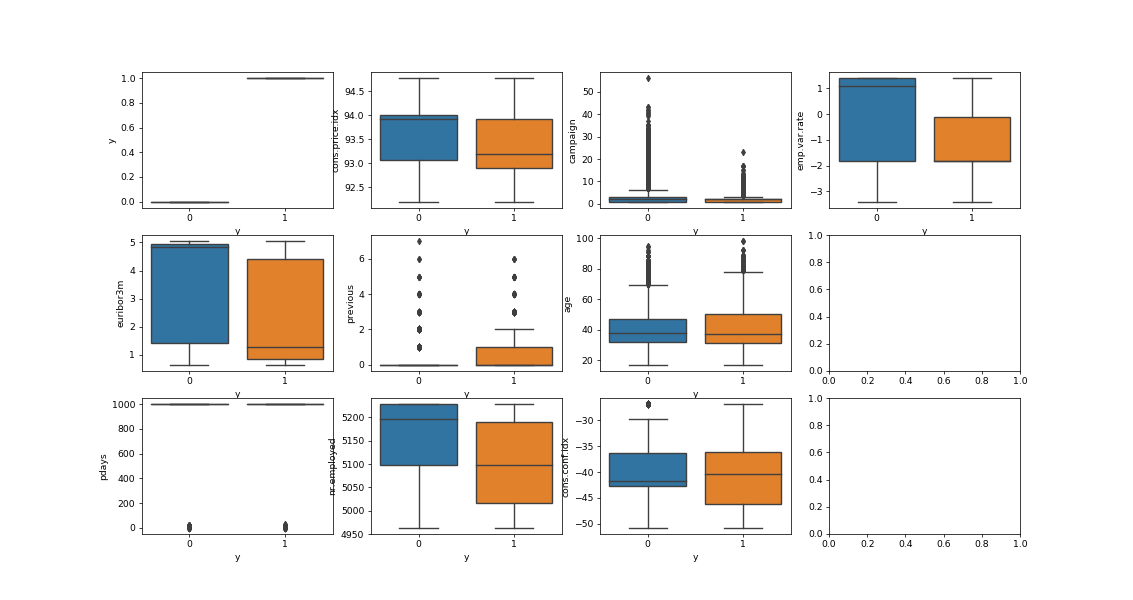

In [128]:
%matplotlib notebook
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(17, 9))

for idx, feat in  enumerate(features_numer):
    sns.boxplot(x='y', y=feat, data=data_numer, ax=axes[idx  % 3, int (idx  / 3)])

In [10]:
%matplotlib notebook
features_obj = []
for i in range(len(data.columns)):
    if data.iloc[:,i].dtype == 'O':
        features_obj.append(data.iloc[:,i].name)
features_obj = list(set(features_obj))
data_obj = pd.DataFrame(data,columns=features_obj)

In [88]:
for idx, feat in enumerate(features_obj):
    print("Count distinct values for %s: %s" % (data2[feat].name, data2[feat].nunique()))

Count distinct values for education: 8
Count distinct values for contact: 2
Count distinct values for month: 10
Count distinct values for housing: 3
Count distinct values for default: 3
Count distinct values for job: 12
Count distinct values for day_of_week: 5
Count distinct values for poutcome: 3
Count distinct values for marital: 4
Count distinct values for loan: 3


In [89]:
# Распределения категориальных переменных при разных значениях зависимой переменной

<IPython.core.display.Javascript object>


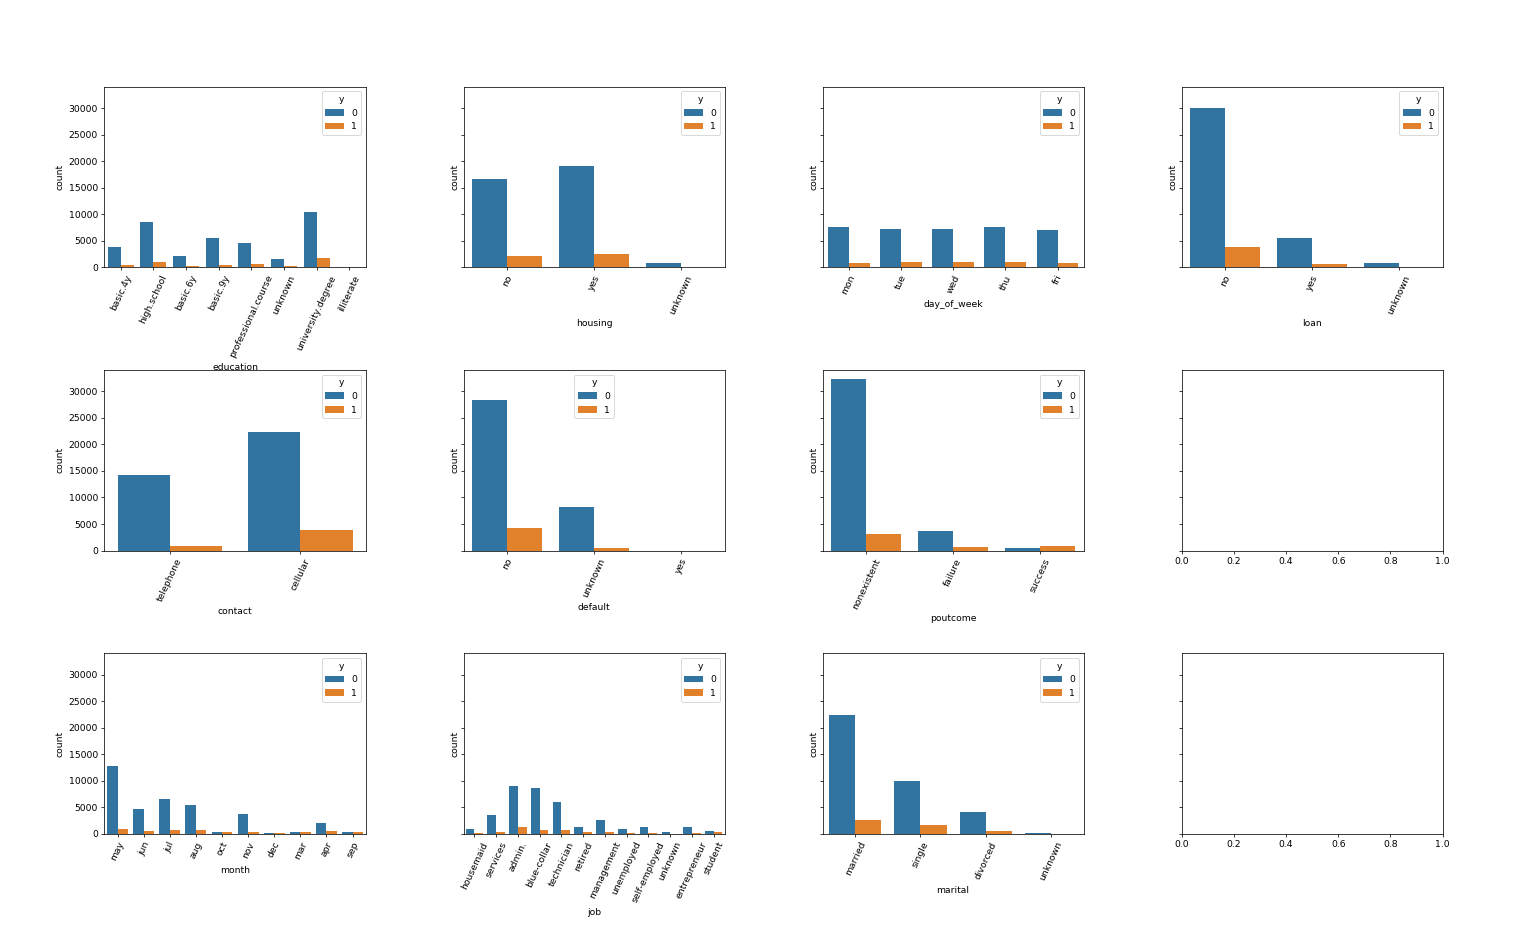

[Text(0.0, 0, 'basic.4y'),
 Text(0.2, 0, 'high.school'),
 Text(0.4, 0, 'basic.6y'),
 Text(0.6000000000000001, 0, 'basic.9y'),
 Text(0.8, 0, 'professional.course'),
 Text(1.0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

[Text(0.0, 0, 'telephone'), Text(0.2, 0, 'cellular')]

[Text(0.0, 0, 'may'),
 Text(0.2, 0, 'jun'),
 Text(0.4, 0, 'jul'),
 Text(0.6000000000000001, 0, 'aug'),
 Text(0.8, 0, 'oct'),
 Text(1.0, 0, 'nov'),
 Text(0, 0, 'dec'),
 Text(0, 0, 'mar'),
 Text(0, 0, 'apr'),
 Text(0, 0, 'sep')]

[Text(0.0, 0, 'no'), Text(0.2, 0, 'yes'), Text(0.4, 0, 'unknown')]

[Text(0.0, 0, 'no'), Text(0.2, 0, 'unknown'), Text(0.4, 0, 'yes')]

[Text(0.0, 0, 'housemaid'),
 Text(0.2, 0, 'services'),
 Text(0.4, 0, 'admin.'),
 Text(0.6000000000000001, 0, 'blue-collar'),
 Text(0.8, 0, 'technician'),
 Text(1.0, 0, 'retired'),
 Text(0, 0, 'management'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'student')]

[Text(0.0, 0, 'mon'),
 Text(0.2, 0, 'tue'),
 Text(0.4, 0, 'wed'),
 Text(0.6000000000000001, 0, 'thu'),
 Text(0.8, 0, 'fri')]

[Text(0.0, 0, 'nonexistent'), Text(0.2, 0, 'failure'), Text(0.4, 0, 'success')]

[Text(0.0, 0, 'married'),
 Text(0.2, 0, 'single'),
 Text(0.4, 0, 'divorced'),
 Text(0.6000000000000001, 0, 'unknown')]

[Text(0.0, 0, 'no'), Text(0.2, 0, 'yes'), Text(0.4, 0, 'unknown')]

In [129]:
figure, axes = plt.subplots(nrows=3, ncols=4, sharey=True, figsize=(23, 14))
figure.tight_layout(pad=9)

for idx, feat in  enumerate(features_obj):
    chart = sns.countplot(x=feat, hue='y', data=data2, ax=axes[idx  % 3, int (idx  / 3)])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=65)

In [91]:
# Отдельные графики для некоторых переменных

<IPython.core.display.Javascript object>


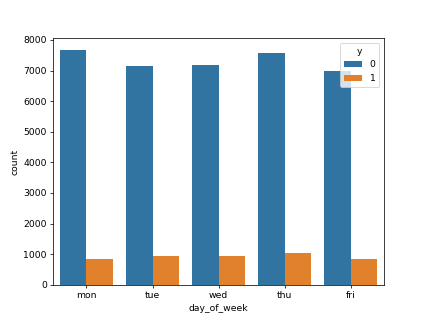

In [130]:
%matplotlib notebook
sns.countplot(x='day_of_week', hue='y', data=data2)

<IPython.core.display.Javascript object>


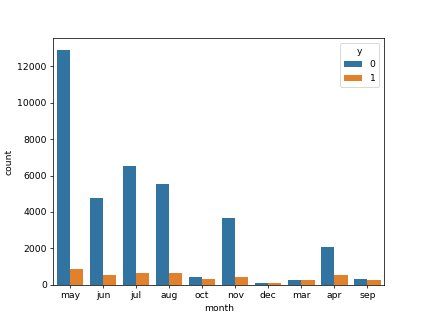

In [127]:
%matplotlib notebook
sns.countplot(x='month', hue='y', data=data2)

In [94]:
#data2 = data2[data2['campaign']<=10 && data2['campaign']]

In [95]:
# Удаляю переменную, не содержащую практически никакой полезной информации

In [60]:
X = data2.drop(['default'], axis=1)

In [44]:
# Удаляю два из трех сильно коррелирующих между собой признаков

In [68]:
X = data2.drop(['emp.var.rate'], axis=1).drop(['nr.employed'], axis=1).drop(['y'], axis=1)

## Modeling

In [97]:
# Кодирую категориальные переменные через LabelEncoder, т.к. LightGBM обрабатывает категориальные переменные, принимая их на вход все равно только в виде чисел

In [69]:
X_enc = X.apply(LabelEncoder().fit_transform)
X_enc.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,18,16,287
1,40,7,1,3,1,0,0,1,6,1,0,26,0,1,18,16,287
2,20,7,1,3,0,2,0,1,6,1,0,26,0,1,18,16,287
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,18,16,287
4,39,7,1,3,0,0,2,1,6,1,0,26,0,1,18,16,287


In [99]:
# Сперва хотел использовать CatBoost, но столкнулся с техническими ограничениями

In [101]:
'''from sklearn.metrics import make_scorer, accuracy_score
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(iterations=500, logging_level='Silent')
params = {'learning_rate': [0.01, 0.05, 0.075, 0.1, 0.2], 'depth': [4, 5, 6]}
scorer = make_scorer(accuracy_score)
model = GridSearchCV(cbc, params,  scoring = scorer, cv = 4, refit=True)

X_train_forGS = X_train.apply(LabelEncoder().fit_transform)
X_train_forGS.head()
model.fit(X_train_forGS, Y_train)
print("Best parameters set found on development set:")
print(model.best_params_)

cat_features_indexes = np.where(X_train.dtypes == object)[0]

cbc_best = CatBoostClassifier()
xtrain, xval, ytrain, yval = train_test_split(X_train, Y_train, train_size=0.8, random_state=42)
cate_features_index = np.where(X_train_eng.dtypes != float)[0]'''

'from sklearn.metrics import make_scorer, accuracy_score\ncbc = CatBoostClassifier(iterations=500, logging_level=\'Silent\')\nparams = {\'learning_rate\': [0.01, 0.05, 0.075, 0.1, 0.2], \'depth\': [4, 5, 6]}\nscorer = make_scorer(accuracy_score)\nmodel = GridSearchCV(cbc, params,  scoring = scorer, cv = 4, refit=True)\n\nX_train_forGS = X_train.apply(LabelEncoder().fit_transform)\nX_train_forGS.head()\nmodel.fit(X_train_forGS, Y_train)\nprint("Best parameters set found on development set:")\nprint(model.best_params_)\n\ncat_features_indexes = np.where(X_train.dtypes == object)[0]\n\ncbc_best = CatBoostClassifier()\nxtrain, xval, ytrain, yval = train_test_split(X_train, Y_train, train_size=0.8, random_state=42)\ncate_features_index = np.where(X_train_eng.dtypes != float)[0]'

In [56]:
features_obj.remove('default')

In [57]:
features_obj

['education',
 'month',
 'day_of_week',
 'loan',
 'job',
 'poutcome',
 'marital',
 'contact',
 'housing']

In [18]:
from sklearn.metrics import make_scorer, accuracy_score
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import  StratifiedKFold, cross_val_score

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_enc, y, test_size=0.2, random_state=18)

In [71]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score

lgbm_def = LGBMClassifier()

skf = StratifiedKFold(n_splits=5, random_state=12, shuffle=True)
 
#tr_tr_df, v_v_df, y_tr_tr, y_v_v = train_test_split(X_enc, y, test_size=0.3, stratify=y, random_state=9)

lgbm_def_cv_scores = []

for tr, tst in skf.split(X_enc, y):
    tr_df, tst_df = X_enc.iloc[tr, :], X_enc.iloc[tst, :]
    y_tr, y_tst = y.iloc[tr], y.iloc[tst]
    lgbm_def.fit(tr_df, y_tr, categorical_feature=features_obj)
    lgbm_def_cv_scores.append(roc_auc_score(y_tst, lgbm_def.predict_proba(tst_df)[:,1]))
print('Mean not tuned LightGBM score: %0.3f' % np.mean(lgbm_def_cv_scores))

C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['contact', 'day_of_week', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['contact', 'day_of_week', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['contact', 'day_of_week', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Anaconda3\lib\site-packages\lightgbm\basic.py:129

Mean not tuned LightGBM score: 0.802


C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['contact', 'day_of_week', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [1]:
# Использую GridSearchCV для перебора параметров

In [106]:
gridParams = {
    'learning_rate': [0.001,0.005,0.1],
    'n_estimators': [10,40,100],
    'num_leaves': [8,12,16],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1.2,1.4]}

In [107]:
lgbm = LGBMClassifier()

In [108]:
grid = GridSearchCV(lgbm, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=2)

In [110]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'learning_rate': [0.0001, 0.001, 0.005, 0.1], 'num_leaves': [6, 8, 12, 16], 'n_estimators': [10, 40, 100], 'reg_alpha': [1, 1.2], 'reg_lambda': [1, 1.2, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [111]:
print(grid.best_params_)

{'num_leaves': 16, 'learning_rate': 0.1, 'reg_alpha': 1.2, 'n_estimators': 100, 'reg_lambda': 1.4}


In [112]:
params = {}
params['learning_rate'] = grid.best_params_['learning_rate']
params['n_estimators'] = grid.best_params_['n_estimators']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']

In [114]:
lgbm_tuned = LGBMClassifier(**params)
lgbm_tuned.fit(X_train, Y_train, categorical_feature=features_obj)

C:\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['contact', 'day_of_week', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=16, objective=None,
        random_state=None, reg_alpha=1.2, reg_lambda=1.4, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [73]:
pr_train = lgbm_tuned.predict_proba(X_train)[:,1]
pr_test = lgbm_tuned.predict_proba(X_test)[:,1]
auc_train = metrics.roc_auc_score(Y_train,pr_train)
auc_test = metrics.roc_auc_score(Y_test,pr_test)
gini_train = 2 * auc_train - 1
gini_test = 2 * auc_test - 1
print(auc_train)
print(auc_test)

0.8430356387778282
0.832412352306167


<IPython.core.display.Javascript object>


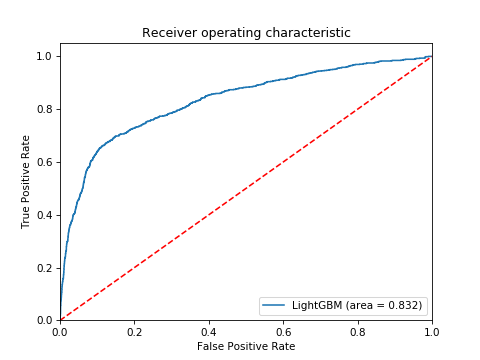

In [74]:
from sklearn.metrics import roc_curve
logit_roc_auc = metrics.roc_auc_score(Y_test, pr_test)
fpr, tpr, thresholds = roc_curve(Y_test, lgbm_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LightGBM (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Значимость переменных

In [75]:
lfi = lgbm_tuned.feature_importances_
lfidf = pd.DataFrame([lfi, X.columns]).T

top_features:
   weight         feature
0     322       euribor3m
1     229             age
2     141        campaign
3     128             job
4     113           month
5      88  cons.price.idx
6      77     day_of_week
7      66       education
8      54         contact
9      54           pdays
10     50   cons.conf.idx
11     46         marital
12     46        poutcome
13     31         housing
14     25            loan


<IPython.core.display.Javascript object>


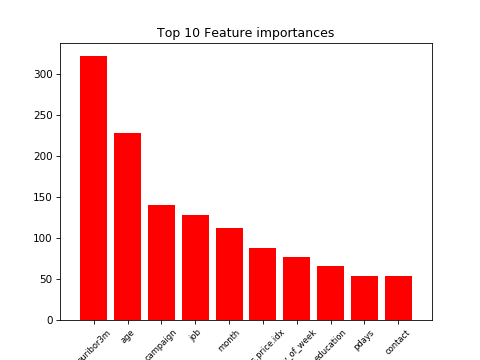

In [76]:
import matplotlib.pyplot as plt
lfidf.columns = ['weight', 'feature']
lfidf = lfidf.sort_values('weight', ascending=False)[:15].reset_index(drop=True)
print('top_features:')
print(lfidf)
indices = np.argsort(lfi)[::-1]
indices=indices[:10] 
plt.figure()
plt.title("Top 10 Feature importances") 
plt.bar(range(10), lfi[indices], color="r", align="center") 
plt.xticks(range(10), X.columns[indices], fontsize=8, rotation=45) 
plt.xlim([-1, 10])
plt.show()